# Read and Examine Data

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
DATA_DIR = Path('LoanData')

In [126]:
#Read in Lending Club loans data into a DataFrame called 'loans'
loans_path = DATA_DIR / 'loan.csv'
loans = pd.read_csv(loans_path)

C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
#Examine first few rows of data
loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
print(loans.shape)

(887379, 74)


In [129]:
#Summarize variables
print(loans.info())
# Summary below indicates variables are a mix of numeric and object (categorical or string).
# Several variables also have missing values, especially loan description, months since last delinquency, public record and most
# recent 90-day or worse rating, 'co-borrower' variables such as combined self-reported annual income provided by
# co-borrowers during registration, co-borrower dti ratio and joint borrower verification status, number of open trades 
# in last 6 months as well as number of currently active installment trades, installment accounts opened in past 12-24 
# months, total current balance of all installment accounts, no. of revolving trades opened in last 12-24 months, max current
# balance owed on all revolving accounts, no. of personal finance and credit inquiries, and no. of finance trades. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [130]:
#Summarize numeric data
print(loans.describe())

                 id     member_id      loan_amnt    funded_amnt  \
count  8.873790e+05  8.873790e+05  887379.000000  887379.000000   
mean   3.246513e+07  3.500182e+07   14755.264605   14741.877625   
std    2.282734e+07  2.411335e+07    8435.455601    8429.897657   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    9.206643e+06  1.087713e+07    8000.000000    8000.000000   
50%    3.443327e+07  3.709528e+07   13000.000000   13000.000000   
75%    5.490814e+07  5.847135e+07   20000.000000   20000.000000   
max    6.861706e+07  7.354484e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    887379.000000  887379.000000  887379.000000  8.873750e+05   
mean      14702.464383      13.246740     436.717127  7.502759e+04   
std        8442.106732       4.381867     244.186593  6.469830e+04   
min           0.000000       5.320000      15.670000  0.000000e+00   
25%        8000.000000       9.990000     260.

In [131]:
#Summarize non-numeric data
loans.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835917,842554,887379,887379,887379,887379,887379,...,887227,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299271,11,6,3,103,10,2,...,63144,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,...,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,...,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


In [ ]:
#Examine frequency counts for most relevant non-numeric variables

In [132]:
loans.loc[:,'sub_grade'].value_counts(dropna=False)

B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64

In [133]:
loans.loc[:,'grade'].value_counts(dropna=False)

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [134]:
loans.loc[:,'emp_length'].value_counts(dropna=False)

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
NaN           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [135]:
loans.loc[:,'home_ownership'].value_counts(dropna=False)

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [136]:
loans.loc[:,'pymnt_plan'].value_counts(dropna=False)
# Very imbalanced value distribution for this variable (which indicates if payment plan has been put in place)
# Only 10 loans have payment plan in place. Thus, do not consider this variable going forward. 

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [137]:
loans.loc[:,'verification_status'].value_counts(dropna=False)

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [138]:
loans.loc[:,'term'].value_counts(dropna=False)


 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [139]:
loans.loc[:,'addr_state'].value_counts(dropna=False)
# Most loans are in CA, followed by NY, TX and FL. High concentration of loans in a few states implies it is best
# to filter down state dummies used in eventual model - will discuss further below

CA    129517
NY     74086
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
CT     13531
TN     12887
NV     12443
WI     11574
AL     11200
OR     10893
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6264
NM      4939
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64

In [140]:
loans.loc[:,'purpose'].value_counts(dropna=False)

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

# Choose Relevant Dependent and Independent Variables in Prediction of Loan
# Default


In [ ]:
# I will be developing a model to predict loan default, or more broadly, whether a loan is fully paid off or not. 

# The dependent variable in my model will be 'loan_status' - the current status of the loan. There are 10 values of this variable
# as printed above, including 'Fully Paid', 'Charged Off' (which indicates no longer reasonable expectation of further payments)
# and 'Default'.

# Relevant independent variables: There are 74 variables in total. I will consider the following variables 
# as most relevant potential predictors of loan default. I will categorize these variables as follows:

# Borrower Characteristic Variables:
# 'annual_inc': Self-reported annual income provided by borrower during registration.
# 'addr_state': Borrower state provided in loan application.
# 'home_ownership': home ownership status provided by borrower during registration. 
# 'loan_amnt': listed loan amount applied for by borrower.
# 'purpose': Category provided by borrower for loan request.
# 'emp_length': Employment length in years.
# 'verification_status': Indicates if borrower's income was verified by LC, not verified, or if income source was verified. 

# Borrower Risk Variables:
# 'sub_grade': LC-assigned loan grade based on borrower credit history. Has 7 values: 'A' - 'G', as shown above. 
# 'int_rate': (Annual) Interest Rate on the loan. 
# 'dti': Ratio calculated using borrower's total monthly debt payments on total debt obligations, excluding mortgage
#  and the requested LC loan, divided by borrower's self-repoted monthly income.
# 'delinq_2yrs': No. of 30+ days past-due incidences of delinquency in borower's credit file for past 2 years.
# 'inq_last_6mths': No. of inquiries in past 6 months (excluding auto and mortgage inquiries).
# 'pub_rec': no. of derogatory public records.
# 'revol_bal': Total credit revolving balance.
# 'revol_util': Revolving line utilization rate (amount of credit borrower is using relative to all available revolving credit).
# 'acc_now_delinq': No. of accounts on which borrower is now delinquent.
# 'open_acc': No. of open credit lines in borrower's credit file. 
# 'total_acc': Total no. of credit lines curently in borrower's credit file.
# 'collections_12_mths_ex_med': No. of collections in 12 months (excluding medical).
# 'tot_coll_amt':  Total collection amounts ever owed.

# Other Loan variables:
# 'funded_amnt': Total amount committed to that loan at that point in time.
# 'out_prncp': Remaining outstanding principal for total amount funded.
# 'tot_cur_bal': Total current balance of all accounts.
# 'total_rev_hi_lim': Total revolving credit limit.
# 'term': No of months (36 or 60) of term of loan.

# Data Cleaning and Filtering  

In [145]:
# Remove empty rows (or rows with all missing values)
loans.dropna(how='all', inplace=True)
print(loans.shape)
# no rows removed

(887379, 74)


Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


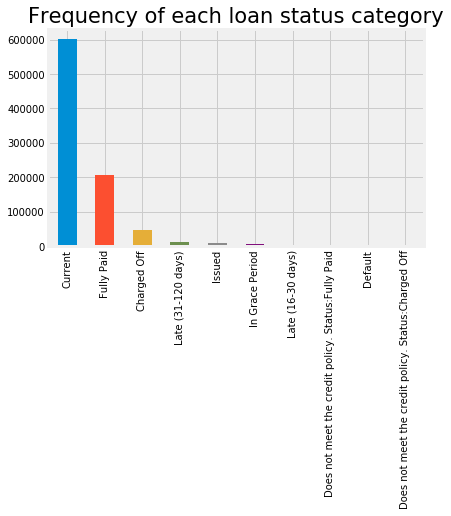

In [146]:
# Select relevant values of dependent variable: Loan Status.
# Plot frequency counts of each loan status category in the dataset.

ax = loans.loc[:,'loan_status'].value_counts().plot(kind='bar')
ax.set_title('Frequency of each loan status category', fontsize=21, y=1)

LoanCounts = loans.loc[:,'loan_status'].value_counts(dropna=False)
print(LoanCounts)

(265781, 74)


C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5,1,'Fully Paid vs. Not Fully Paid Loans')

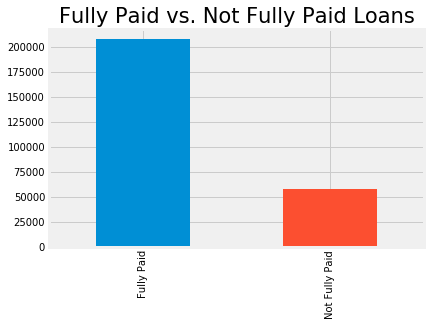

In [147]:
# Exclude irrelevant and/or sparsely populated loan status categories: 'Current', 'Issued', 'In Grace Period', 
# 'Does not meet the credit policy. Status: Fully Paid', 'Late (16-30 days)', and 
# 'Does not meet the credit policy. Status: Charged Off'

LoanStatusCategories = ['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Default']

loans_filtered = loans.loc[loans.loc[:,'loan_status'].isin(LoanStatusCategories),:]
print(loans_filtered.shape)
# 265,781 observations left after filtering relevant loan status categories.

# Code 'Fully Paid' as 1 in my prediction model and combine 'Default', 'Late (31-120 days)' and 'Charged Off' into a new category,
# 'Not Fully Paid', which is coded as 0.
loans_filtered.loc[:,'loan_indicator'] = loans_filtered.loc[:,'loan_status'].map({'Fully Paid':1, 'Charged Off':0, 'Late (31-120 days)':0, 'Default':0})
loans_filtered.loc[:,'loan_status_category'] = loans_filtered.loc[:,'loan_status'].map({'Fully Paid':'Fully Paid','Charged Off':'Not Fully Paid', 'Late (31-120 days)':'Not Fully Paid', 'Default':'Not Fully Paid'})
loans_filtered.head()

# Count 'Fully Paid' vs. 'Not Fully Paid' loans in new dataset.
ax2 = loans_filtered.loc[:,'loan_status_category'].value_counts(dropna=False).plot(kind='bar')
ax2.set_title('Fully Paid vs. Not Fully Paid Loans', fontsize=21, y=1)

#Approximately 20% of total observations are Not Fully Paid, and 80% are Fully Paid. Moderately imbalanced sample.

In [148]:
# Dummy code loan status category variable for exploratory variable relationship charts below

loans_filtered = pd.get_dummies(loans_filtered, columns=['loan_status_category'])
#loans_filtered.columns
loans_filtered.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_indicator,loan_status_category_Fully Paid,loan_status_category_Not Fully Paid
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0


Text(0,0.5,'No. of fully paid vs not fully paid loans')

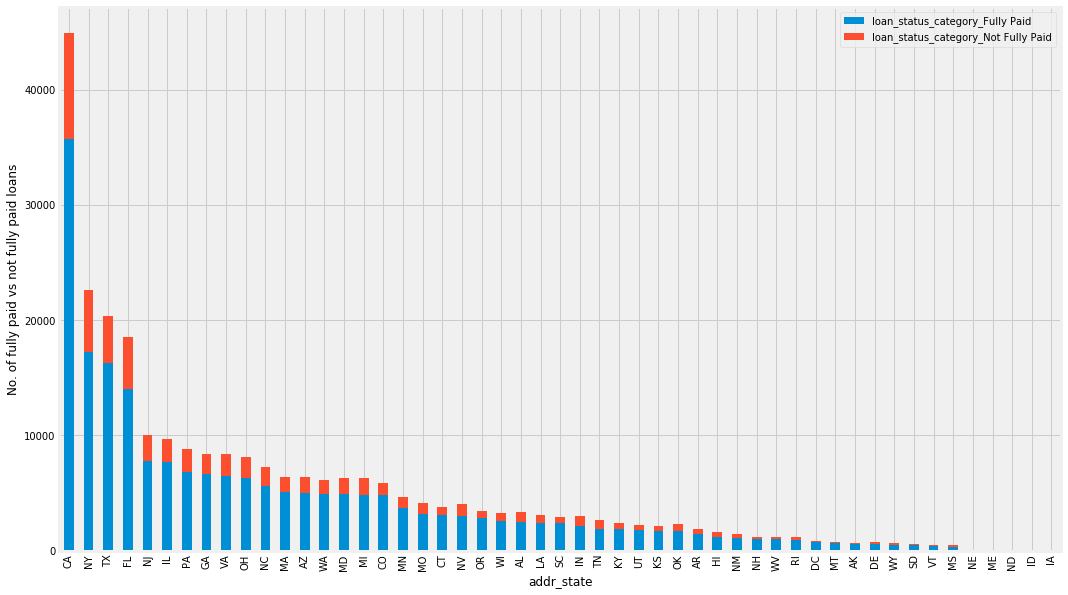

In [149]:
# Check distribution of fully paid vs. not fully paid loans across states
ax = loans_filtered.groupby('addr_state')['loan_status_category_Fully Paid','loan_status_category_Not Fully Paid'].sum().sort_values('loan_status_category_Fully Paid',ascending=False).plot(kind='bar',stacked=True, figsize = (16,10))
ax.set_ylabel('No. of fully paid vs not fully paid loans', fontsize=12)

In [150]:
#Check loan default rate by state
loans_default_by_state = loans_filtered.groupby('addr_state')['loan_status_category_Fully Paid','loan_status_category_Not Fully Paid'].sum()
loans_default_by_state['default_rate'] = loans_default_by_state['loan_status_category_Not Fully Paid'] / loans_default_by_state['loan_status_category_Fully Paid']
loans_default_by_state.sort_values('default_rate',ascending=False)

#highest default rates skewed by low no. of loans in corresponding states 

,loan_status_category_Fully Paid,loan_status_category_Not Fully Paid,default_rate
addr_state,,,
MS,335.0,149.0,0.444776
TN,1863.0,777.0,0.417069
IN,2174.0,825.0,0.379485
NV,3006.0,1056.0,0.351297
AL,2485.0,831.0,0.334406
OK,1710.0,566.0,0.330994
NE,34.0,11.0,0.323529
FL,14021.0,4506.0,0.321375
NY,17214.0,5380.0,0.312536


In [151]:
loans_filtered.loc[:,'addr_state'].value_counts(dropna=False)

#Below shows that top 4 states by no. of loans (CA, NY, TX and FL) dominate datatset, with over 10,000 loans each.
#Propose keeping top 10 states by no. of loans, which constitute ~ 1/2 of total dataset: 
# 'CA', 'NY', 'TX', 'FL','NJ','IL','PA','GA','VA','OH'

CA    44962
NY    22594
TX    20374
FL    18527
NJ    10069
IL     9658
PA     8861
GA     8394
VA     8358
OH     8154
NC     7298
MA     6427
AZ     6398
MD     6337
MI     6314
WA     6139
CO     5840
MN     4680
MO     4120
NV     4062
CT     3822
OR     3477
AL     3316
WI     3228
LA     3125
IN     2999
SC     2952
TN     2640
KY     2370
OK     2276
UT     2200
KS     2157
AR     1848
HI     1569
NM     1453
WV     1198
NH     1186
RI     1151
DC      856
MT      782
DE      703
AK      696
WY      622
SD      583
MS      484
VT      443
NE       45
ME       13
ND        9
IA        6
ID        6
Name: addr_state, dtype: int64

In [152]:
#Include top 10 states by loan count

state_list = ['CA', 'NY', 'TX', 'FL','NJ','IL','PA','GA','VA','OH']

loans_filtered = loans_filtered.loc[loans_filtered.loc[:,'addr_state'].isin(state_list),:]
loans_filtered.shape

#New dataset with top 10 states by loan count has ~ 160,000 observations

(159951, 77)

In [153]:
loans_filtered['addr_state'].value_counts()

CA    44962
NY    22594
TX    20374
FL    18527
NJ    10069
IL     9658
PA     8861
GA     8394
VA     8358
OH     8154
Name: addr_state, dtype: int64

,loan_status_category_Fully Paid,loan_status_category_Not Fully Paid,default_rate
purpose,,,
small_business,2121.0,999.0,0.471004
medical,1353.0,432.0,0.319290
other,7225.0,2281.0,0.315709
moving,1100.0,346.0,0.314545
debt_consolidation,71912.0,21231.0,0.295236
house,854.0,239.0,0.279859
renewable_energy,133.0,37.0,0.278195
vacation,840.0,215.0,0.255952
credit_card,25208.0,6079.0,0.241154


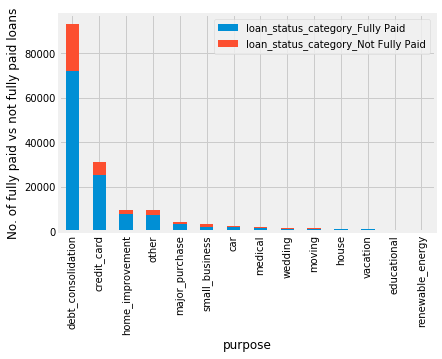

In [154]:
# Plot distribution of fully paid vs. not fully paid loans by loan purpose and sub grade 

ax1 = loans_filtered.groupby('purpose')['loan_status_category_Fully Paid','loan_status_category_Not Fully Paid'].sum().sort_values('loan_status_category_Fully Paid',ascending=False).plot(kind='bar',stacked=True)
ax1.set_ylabel('No. of fully paid vs not fully paid loans', fontsize=12)

loans_default_by_purpose = loans_filtered.groupby('purpose')['loan_status_category_Fully Paid','loan_status_category_Not Fully Paid'].sum()
loans_default_by_purpose['default_rate'] = loans_default_by_purpose['loan_status_category_Not Fully Paid'] / loans_default_by_purpose['loan_status_category_Fully Paid']
loans_default_by_purpose.sort_values('default_rate',ascending=False)

# Majority of loans are for debt consolidation and credit card. Riskiest loans are for small business and medical, which are 
# much more sparsely populated categories. 


,loan_status_category_Fully Paid,loan_status_category_Not Fully Paid,default_rate
sub_grade,,,
G5,54.0,73.0,1.351852
G3,121.0,122.0,1.008264
G1,244.0,239.0,0.979508
G2,183.0,179.0,0.978142
F4,403.0,391.0,0.970223
F5,341.0,315.0,0.923754
F3,554.0,503.0,0.907942
F1,863.0,621.0,0.719583
E5,1085.0,772.0,0.711521


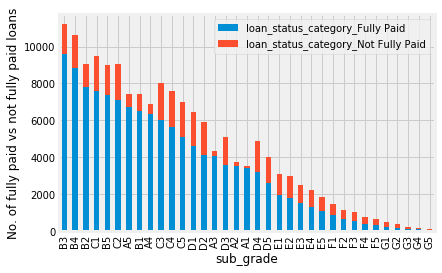

In [155]:
ax2 = loans_filtered.groupby('sub_grade')['loan_status_category_Fully Paid','loan_status_category_Not Fully Paid'].sum().sort_values('loan_status_category_Fully Paid',ascending=False).plot(kind='bar',stacked=True)
ax2.set_ylabel('No. of fully paid vs not fully paid loans', fontsize=12)

loans_default_by_grade = loans_filtered.groupby('sub_grade')['loan_status_category_Fully Paid','loan_status_category_Not Fully Paid'].sum()
loans_default_by_grade['default_rate'] = loans_default_by_grade['loan_status_category_Not Fully Paid'] / loans_default_by_grade['loan_status_category_Fully Paid']
loans_default_by_grade.sort_values('default_rate',ascending=False)

#Below shows that proportion of not fully paid loans tends to increase as sub grade decreases, which makes sense. 
# Very few loans in bottom two grades: F and G. 

In [156]:
# Only include relevant independent variables as specified above and dependent variable loan_indicator

variable_list = ['loan_indicator','annual_inc','addr_state','home_ownership','loan_amnt','purpose','emp_length','verification_status',
                'sub_grade','int_rate', 'dti','delinq_2yrs','inq_last_6mths','pub_rec','revol_bal', 'revol_util', 'acc_now_delinq',
                'open_acc', 'total_acc','collections_12_mths_ex_med','tot_coll_amt', 'funded_amnt', 'out_prncp', 'tot_cur_bal',
                'total_rev_hi_lim', 'term']
print(len(variable_list))

#Filtered dataset down to 26 relevant variables
#Create new loan dataset only including these 26 variables

loans_filtered_variables = loans_filtered.loc[:,variable_list]
print(loans_filtered_variables.shape)
print(loans_filtered_variables.info())

#Dataset now has 159,951 rows and 26 columns.
# 8 variables are object, 18 are numeric.

26
(159951, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159951 entries, 1 to 887371
Data columns (total 26 columns):
loan_indicator                159951 non-null int64
annual_inc                    159951 non-null float64
addr_state                    159951 non-null object
home_ownership                159951 non-null object
loan_amnt                     159951 non-null float64
purpose                       159951 non-null object
emp_length                    153908 non-null object
verification_status           159951 non-null object
sub_grade                     159951 non-null object
int_rate                      159951 non-null float64
dti                           159951 non-null float64
delinq_2yrs                   159951 non-null float64
inq_last_6mths                159951 non-null float64
pub_rec                       159951 non-null float64
revol_bal                     159951 non-null float64
revol_util                    159828 non-null float64
acc_now_delinq   

total_rev_hi_lim            total_rev_hi_lim              1.000000
revol_bal                   revol_bal                     1.000000
funded_amnt                 funded_amnt                   1.000000
tot_coll_amt                tot_coll_amt                  1.000000
collections_12_mths_ex_med  collections_12_mths_ex_med    1.000000
total_acc                   total_acc                     1.000000
open_acc                    open_acc                      1.000000
acc_now_delinq              acc_now_delinq                1.000000
pub_rec                     pub_rec                       1.000000
tot_cur_bal                 tot_cur_bal                   1.000000
inq_last_6mths              inq_last_6mths                1.000000
delinq_2yrs                 delinq_2yrs                   1.000000
dti                         dti                           1.000000
int_rate                    int_rate                      1.000000
loan_amnt                   loan_amnt                     1.00

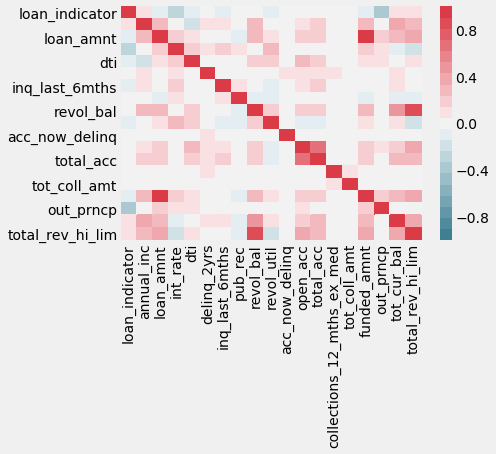

In [157]:
#Check correlation between (numeric) variables above to detect multicollinearity (i.e. variables that are highly inter-correlated)

import seaborn as sns

plt.style.use('fivethirtyeight')

ax_corr = sns.heatmap(loans_filtered_variables.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(h_neg=220,h_pos=10,n=21))
loans_filtered_variables.corr().abs().unstack().sort_values(ascending=False)
#Below correlation values and heatmap show that following sets of independent variables are highly positively correlated (>~0.4):
#loan_amnt and funded_amnt (0.998)
#revol_bal and total_rev_hi_lim (0.83)
#open_acc and total_acc (0.68)
#tot_cur_bal and annual_inc (0.42)
#revol_bal and tot_cur_bal (0.43)
#total_rev_hi_lim and total_cur_bal (0.41)

#Based on these high positive correlations, I choose to drop:
#'loan_amnt' (keep 'funded_amnt'), 'total_rev_hi_lim' (keep 'revol_bal'), 'total_acc' (keep 'open_acc'), 'total_cur_bal'.

out_prncp                   out_prncp                     1.000000
funded_amnt                 funded_amnt                   1.000000
annual_inc                  annual_inc                    1.000000
int_rate                    int_rate                      1.000000
dti                         dti                           1.000000
delinq_2yrs                 delinq_2yrs                   1.000000
inq_last_6mths              inq_last_6mths                1.000000
pub_rec                     pub_rec                       1.000000
revol_util                  revol_util                    1.000000
acc_now_delinq              acc_now_delinq                1.000000
open_acc                    open_acc                      1.000000
collections_12_mths_ex_med  collections_12_mths_ex_med    1.000000
tot_coll_amt                tot_coll_amt                  1.000000
revol_bal                   revol_bal                     1.000000
loan_indicator              loan_indicator                1.00

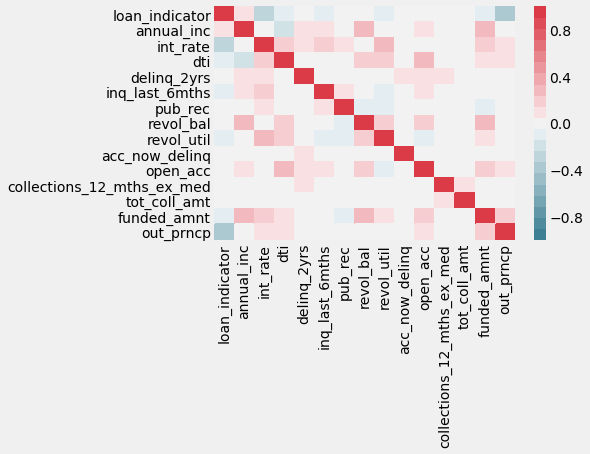

In [158]:
#Drop variables specified above and recheck correlations:

drop_list = ['loan_amnt', 'total_rev_hi_lim', 'total_acc', 'tot_cur_bal']
loans_filtered_variables.drop(drop_list,axis='columns',inplace=True)

ax2_corr = sns.heatmap(loans_filtered_variables.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(h_neg=220,h_pos=10,n=21))
loans_filtered_variables.corr().abs().unstack().sort_values(ascending=False)

#keep remaining variables

In [159]:
#Check number of missing values for each remaining variable
loans_filtered_variables.isnull().sum()

loan_indicator                    0
annual_inc                        0
addr_state                        0
home_ownership                    0
purpose                           0
emp_length                     6043
verification_status               0
sub_grade                         0
int_rate                          0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
pub_rec                           0
revol_bal                         0
revol_util                      123
acc_now_delinq                    0
open_acc                          0
collections_12_mths_ex_med       22
tot_coll_amt                  40831
funded_amnt                       0
out_prncp                         0
term                              0
dtype: int64

In [160]:
# Examine missing values of each included variable

# From summary above, variables with missing values are: emp_length, revol_util,collections_12_mths_ex_med and tot_coll_amt

# ~160,000 observations in total
# tot_coll_amt: ~41,000 missing values, ~25% of total observations. Relatively high proportion of missing values and relatively
# less relevant input variable - thus drop this entire variable.

loans_filtered_variables.drop('tot_coll_amt',axis='columns',inplace=True)

# revol_util: 123 missing values (very small proportion relative to total observations, <1000th, so DROP these missing values)

# collections_12_mths_ex_med: 22 missing values, again very small proportion of total dataset, so DROP these missing values

loans_filtered_variables_2 = loans_filtered_variables.loc[(loans_filtered_variables.loc[:,'revol_util'].notnull()) 
                             & (loans_filtered_variables.loc[:,'collections_12_mths_ex_med'].notnull()),:]

# emp_length: ~6,000 missing values. This variable is categorical with a category 'NaN' for missing values. Propose keeping
# emp_length missing values.

# Recheck missing values - only emp_length variable has missing values now
loans_filtered_variables_2.isnull().sum()

loan_indicator                   0
annual_inc                       0
addr_state                       0
home_ownership                   0
purpose                          0
emp_length                    6040
verification_status              0
sub_grade                        0
int_rate                         0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
pub_rec                          0
revol_bal                        0
revol_util                       0
acc_now_delinq                   0
open_acc                         0
collections_12_mths_ex_med       0
funded_amnt                      0
out_prncp                        0
term                             0
dtype: int64

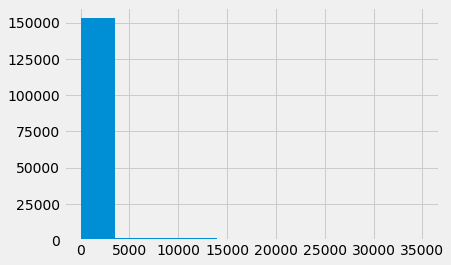

In [161]:
# Check distributions of certain potentially irrelevant loan variables 
ax1 = loans_filtered_variables_2.loc[:,'out_prncp'].hist()

# out_prncp mostly clusters around 0 - remove variable

In [162]:
# Remove 'out_prncp' due to small variation
loans_filtered_variables_2.drop('out_prncp',axis='columns',inplace=True)


C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


0.0    158705
1.0      1025
2.0        67
3.0         6
4.0         2
6.0         1
Name: collections_12_mths_ex_med, dtype: int64

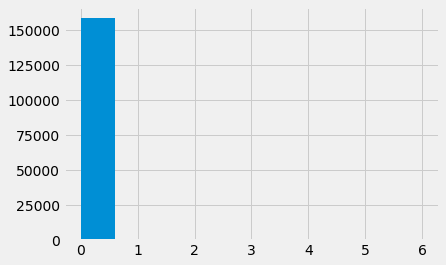

In [163]:
# Check distributions of other potentially irrelevant loan variables 
loans_filtered_variables_2.loc[:,'collections_12_mths_ex_med'].hist()
loans_filtered_variables_2.loc[:,'collections_12_mths_ex_med'].value_counts()

#Values mostly cluster at 0 - again remove this variable due to little variation

In [164]:
# Remove 'collections_12_mths_ex_med' due to little variation
loans_filtered_variables_2.drop('collections_12_mths_ex_med',axis='columns',inplace=True)


C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [165]:
# Normalize relevant loan variables by dividing by funded amount, then drop funded_amnt

#revol_bal

loans_filtered_variables_2.loc[:,'revol_bal_norm'] = loans_filtered_variables_2.loc[:,'revol_bal'] / loans_filtered_variables_2.loc[:,'funded_amnt']

#annual_inc

loans_filtered_variables_2.loc[:,'annual_inc_norm'] = loans_filtered_variables_2.loc[:,'annual_inc'] / loans_filtered_variables_2.loc[:,'funded_amnt']

    
loans_filtered_variables_2.drop('revol_bal',axis='columns',inplace=True)
loans_filtered_variables_2.drop('annual_inc',axis='columns',inplace=True)
loans_filtered_variables_2.drop('funded_amnt',axis='columns',inplace=True) 
loans_filtered_variables_2.info()

C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159806 entries, 1 to 887371
Data columns (total 18 columns):
loan_indicator         159806 non-null int64
addr_state             159806 non-null object
home_ownership         159806 non-null object
purpose                159806 non-null object
emp_length             153766 non-null object
verification_status    159806 non-null object
sub_grade              159806 non-null object
int_rate               159806 non-null float64
dti                    159806 non-null float64
delinq_2yrs            159806 non-null float64
inq_last_6mths         159806 non-null float64
pub_rec                159806 non-null float64
revol_util             159806 non-null float64
acc_now_delinq         159806 non-null float64
open_acc               159806 non-null float64
term                   159806 non-null object
revol_bal_norm         159806 non-null float64
annual_inc_norm        159806 non-null float64
dtypes: float64(10), int64(1), object(7)
memory usag

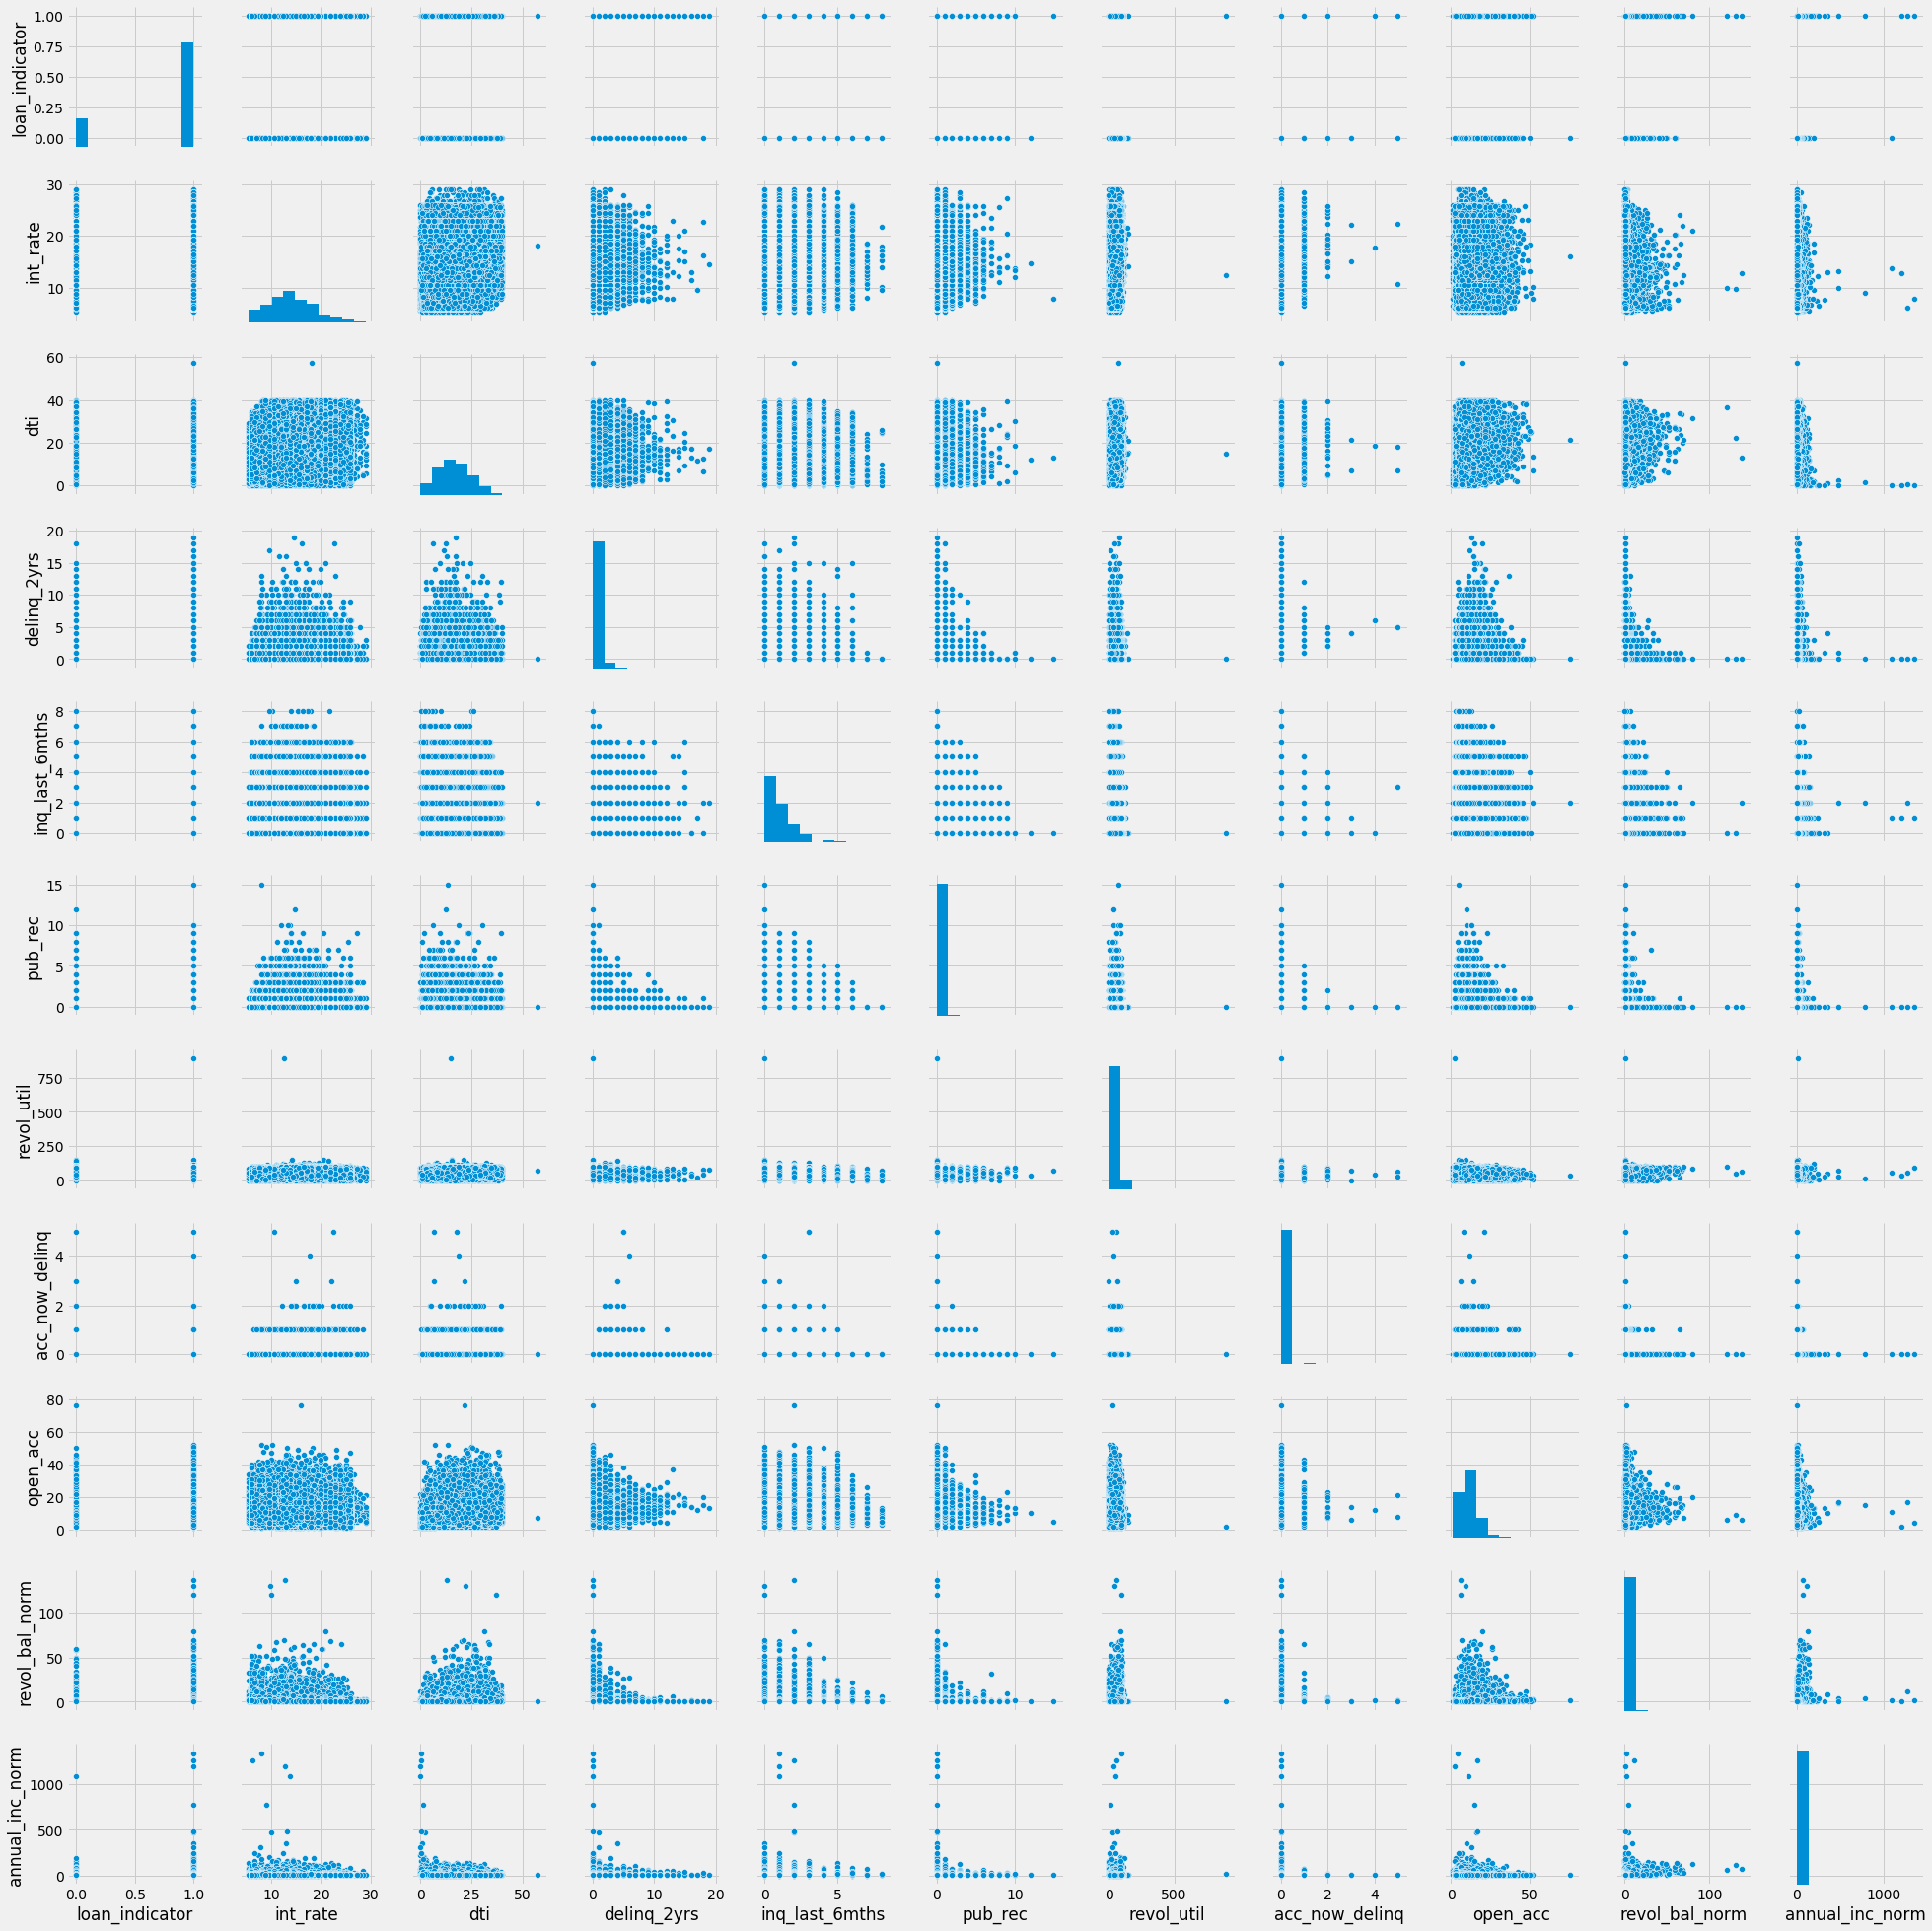

In [166]:
# visualizations of numeric variables
g = sns.pairplot(loans_filtered_variables_2)

# Examining scatter plots below, some variables have outliers (especially dti, pub_rec, revol_util, acc_now_delinq,
# open_acc, revol_bal_norm and and annual_inc_norm), which I will examine more closely next. 

# Negative relationships between:
# dti/delinquency/inq_last_6mths and annual income (makes sense); 
# pub_rec and dti/delinquency/inq_last_6mths (doesn't make as much sense, would expect positively correlated since all are 
# measures of borrower risk. Consider dropping pub_rec);
# open_acc and pub_rec/annual income/delinquency (makes sense that open_acc is negatively correlated with income, less so
# with pub_rec and delinquency since all are measures of borrower risk). 


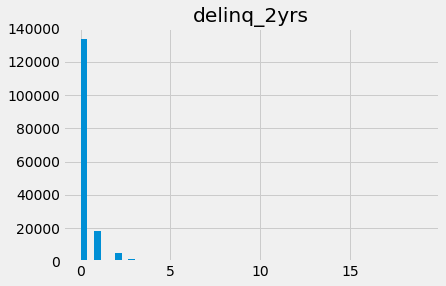

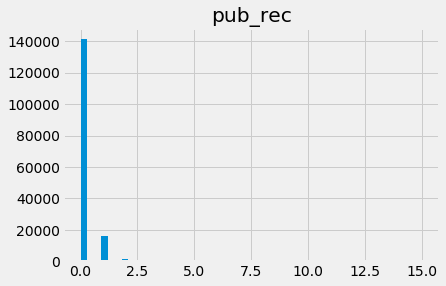

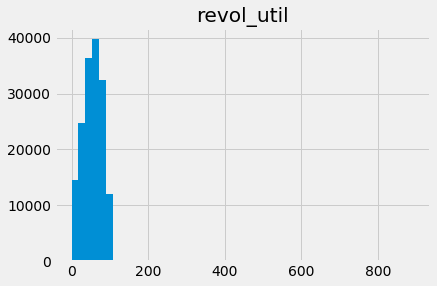

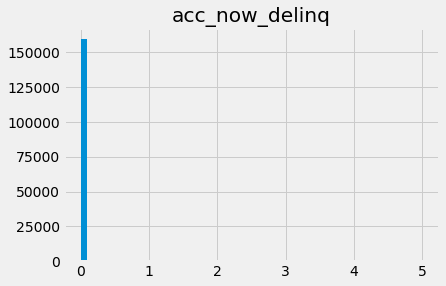

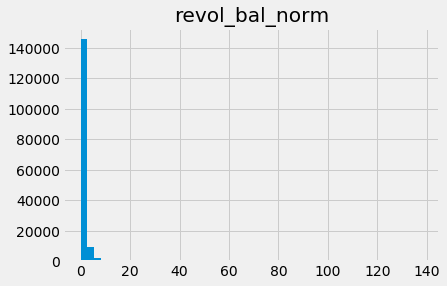

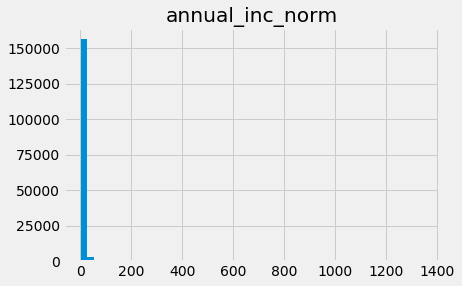

In [167]:
# Examine variables which appear to have low variation based on histograms above: delinq_2yrs, pub_rec, revol_util,
# acc_now_delinq, revol_bal_norm and annual_inc_norm

variables_lowvar = ['delinq_2yrs', 'pub_rec', 'revol_util', 'acc_now_delinq', 'revol_bal_norm', 'annual_inc_norm']


for var in variables_lowvar:
    x = loans_filtered_variables_2.loc[:,var]
    fig,ax = plt.subplots()
    ax.hist(x, bins=50)
    ax.set_title(var)


In [168]:
for var in variables_lowvar:
    x = loans_filtered_variables_2.loc[:,var]
    print(x.value_counts())

0.0     133581
1.0      18084
2.0       5027
3.0       1665
4.0        690
5.0        346
6.0        172
7.0         93
8.0         50
9.0         31
10.0        23
11.0        14
12.0        13
15.0         4
14.0         4
13.0         3
16.0         2
18.0         2
17.0         1
19.0         1
Name: delinq_2yrs, dtype: int64
0.0     141326
1.0      16251
2.0       1534
3.0        440
4.0        133
5.0         62
6.0         33
7.0         10
8.0          6
9.0          6
10.0         3
15.0         1
12.0         1
Name: pub_rec, dtype: int64
0.00      1114
61.00      293
63.00      281
57.00      280
54.00      277
60.00      273
53.00      273
50.00      270
56.00      268
62.00      266
59.00      263
58.00      262
67.00      260
68.70      256
52.00      256
41.00      256
61.50      254
55.10      252
55.00      250
49.00      250
61.30      250
47.00      249
70.00      249
59.50      248
51.00      248
66.00      248
76.00      247
62.60      246
65.00      246
71.00     

In [169]:
#remove acc_now_delinq and revol_bal_norm due to particularly low variation, and pub_rec due to low variation and unexpected
#relationships with other borrower risk variables as shown above

loans_filtered_variables_2.drop('acc_now_delinq',axis='columns',inplace=True) 


C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [170]:
loans_filtered_variables_2.drop('revol_bal_norm',axis='columns',inplace=True) 

C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [171]:
loans_filtered_variables_2.drop('pub_rec',axis='columns',inplace=True) 

C:\Users\pkumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


count    159806.000000
mean         16.380402
std           7.856277
min           0.000000
25%          10.500000
50%          15.980000
75%          21.877500
max          57.140000
Name: dti, dtype: float64
count    159806.000000
mean         54.100026
std          24.788003
min           0.000000
25%          36.000000
50%          55.500000
75%          73.600000
max         892.300000
Name: revol_util, dtype: float64
count    159806.000000
mean         11.027233
std           4.955100
min           1.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          76.000000
Name: open_acc, dtype: float64
count    159806.000000
mean          7.408326
std          10.055907
min           1.285714
25%           3.570887
50%           5.200000
75%           8.307692
max        1340.782123
Name: annual_inc_norm, dtype: float64


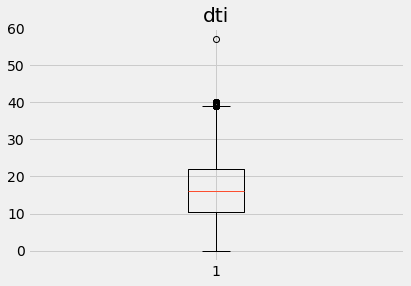

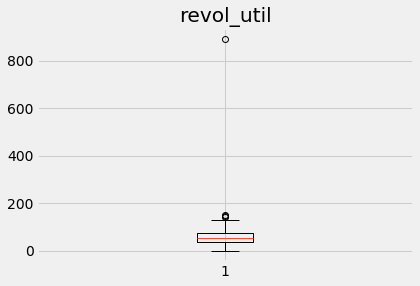

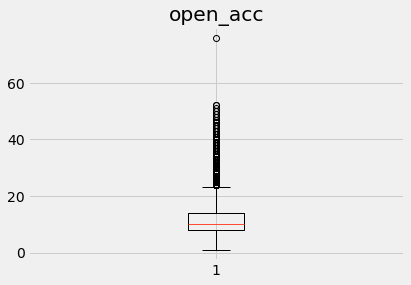

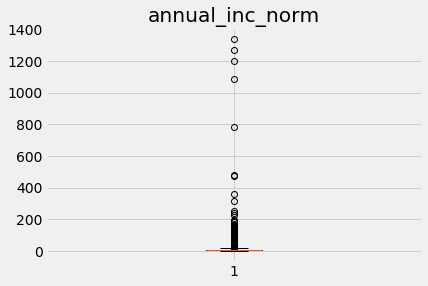

In [172]:
#remove outliers for certain variables based on visualizations above 

outlier_var = ['dti', 'revol_util', 'open_acc', 'annual_inc_norm']

for var in outlier_var:
    x = loans_filtered_variables_2.loc[:,var]
    fig,ax = plt.subplots()
    ax.boxplot(x)
    ax.set_title(var)
    print(x.describe())


In [173]:
# Based on boxplots and pairwise scatter plots above, propose cutting:

# Dti values > 45
# Revol_util values > 100 (revol_util is the amount of credit borrower is using relative to all available revolving credit - this rate should be <= 100 (%))
# open_acc values > 60 (from pairwise scatter plots above, appears that there is one main open_acc outlier which is the max)
# annual_inc_norm > 1000 (from pairwise scatters above, appears to be cluster of income outliers > 1000)

loans_final = loans_filtered_variables_2.loc[(loans_filtered_variables_2.loc[:,'dti'] <= 45) & (loans_filtered_variables_2.loc[:,'revol_util'] <= 100) & (loans_filtered_variables_2.loc[:,'open_acc'] <= 60)
& (loans_filtered_variables_2.loc[:,'annual_inc_norm'] <= 1000),:]
                        

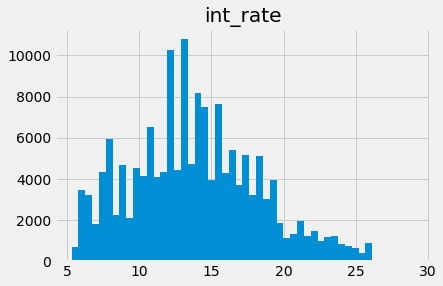

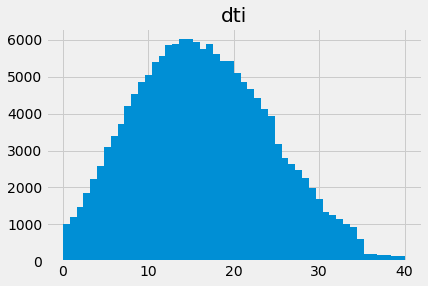

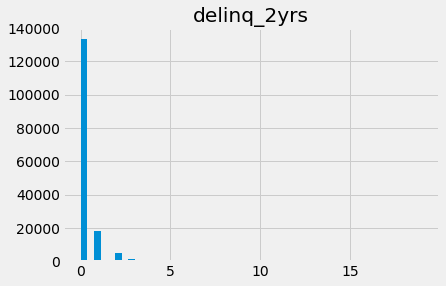

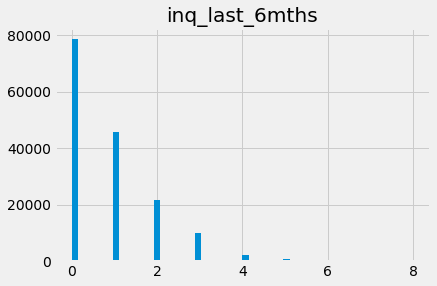

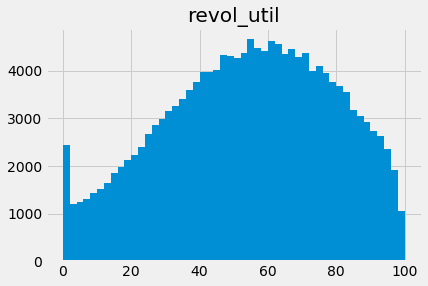

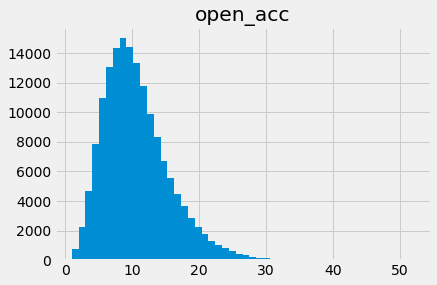

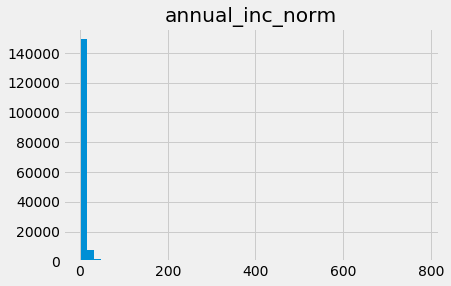

In [175]:
# Plot histograms of remaining numeric variables

numeric_var = ['int_rate','dti','delinq_2yrs','inq_last_6mths','revol_util','open_acc','annual_inc_norm']

for var in numeric_var :
    x = loans_final.loc[:,var]
    fig,ax = plt.subplots()
    ax.hist(x,bins=50)
    ax.set_title(var)

# Distributions now look more reasonable, although normalized annual income is heavily left-skewed. Interest rate distribution 
# makes sense (between 5 and 25%, most around 10-15%).

In [176]:
# Transform categorical (non-numeric) variables into binary dummy variables to complete final dataset

categ_var = ['addr_state', 'home_ownership','purpose','emp_length','verification_status','sub_grade','term']
loans_final = pd.get_dummies(loans_final, columns=categ_var,drop_first=True)

loans_final.columns


Index(['loan_indicator', 'int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'revol_util', 'open_acc', 'annual_inc_norm', 'addr_state_FL',
       'addr_state_GA', 'addr_state_IL', 'addr_state_NJ', 'addr_state_NY',
       'addr_state_OH', 'addr_state_PA', 'addr_state_TX', 'addr_state_VA',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year'

In [179]:
loans_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159431 entries, 1 to 887371
Data columns (total 82 columns):
loan_indicator                         159431 non-null int64
int_rate                               159431 non-null float64
dti                                    159431 non-null float64
delinq_2yrs                            159431 non-null float64
inq_last_6mths                         159431 non-null float64
revol_util                             159431 non-null float64
open_acc                               159431 non-null float64
annual_inc_norm                        159431 non-null float64
addr_state_FL                          159431 non-null uint8
addr_state_GA                          159431 non-null uint8
addr_state_IL                          159431 non-null uint8
addr_state_NJ                          159431 non-null uint8
addr_state_NY                          159431 non-null uint8
addr_state_OH                          159431 non-null uint8
addr_state_PA        